In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# machine learning tools 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\CHARLES\Desktop\New folder\Advertising.csv").set_index('Unnamed: 0')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
def two_plots_num_columns(feature):
    print(f'the skewness value of {feature} column = {df[feature].skew():.2f}')
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title('histogram')
    sns.histplot(data=df,x=feature,kde=True)
    plt.axvline(x=df[feature].mean(),c='red')
    plt.axvline(x=df[feature].median(),c='green')


    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])

    plt.show()
    

the skewness value of Newspaper column = 0.89


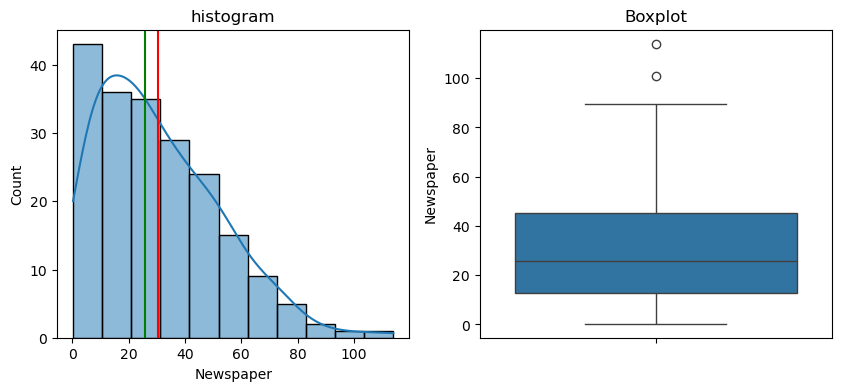

In [8]:
two_plots_num_columns('Newspaper')

the skewness value of TV column = -0.07


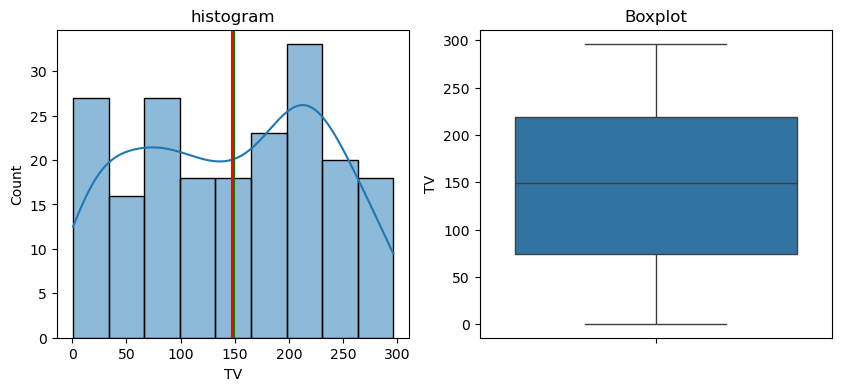

In [9]:
two_plots_num_columns('TV')

the skewness value of Radio column = 0.09


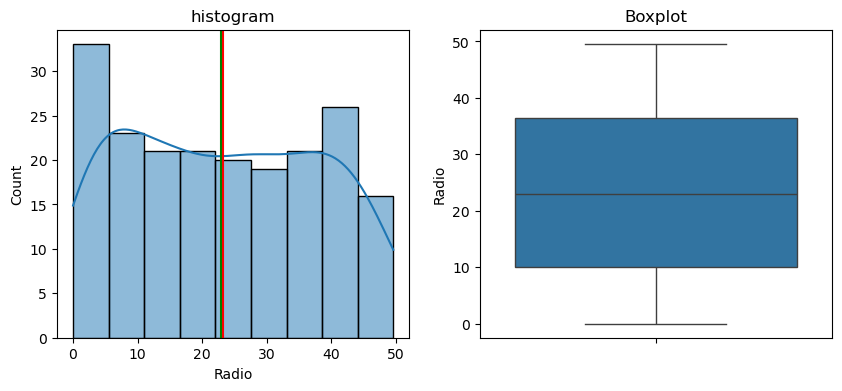

In [10]:
two_plots_num_columns('Radio')

the skewness value of Sales column = 0.41


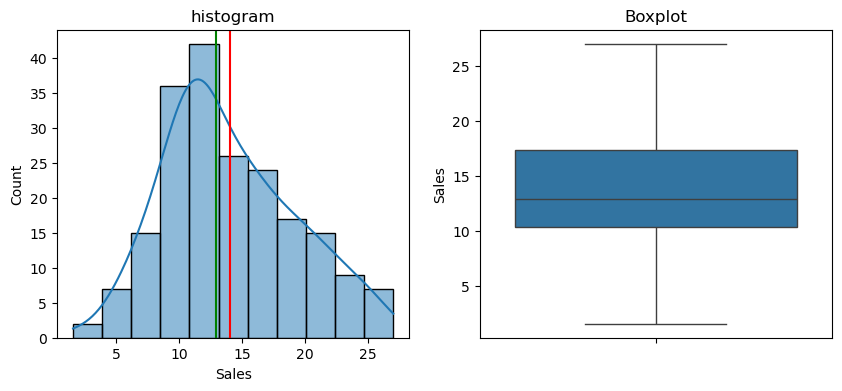

In [11]:
two_plots_num_columns('Sales')


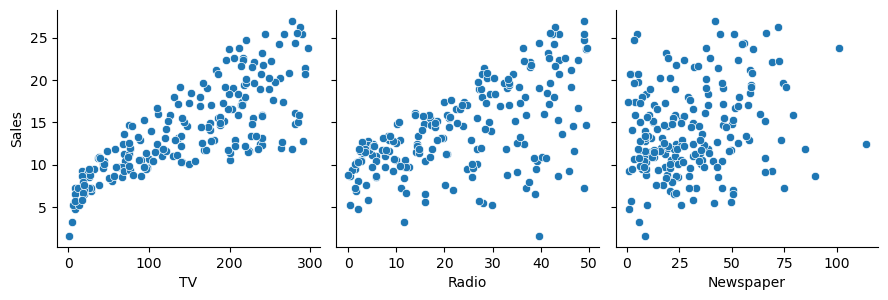

In [13]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=3)

# INSIGHTS 
- It is visible that there is a linear correration between TV feature and sales.
- radio feature doesn't form an accurately linear shape with the sales variable but the radio is still better than the newspaper which does not seems to be correrated with the sales features.

### Muilicollinearity 


<Figure size 1000x1000 with 0 Axes>

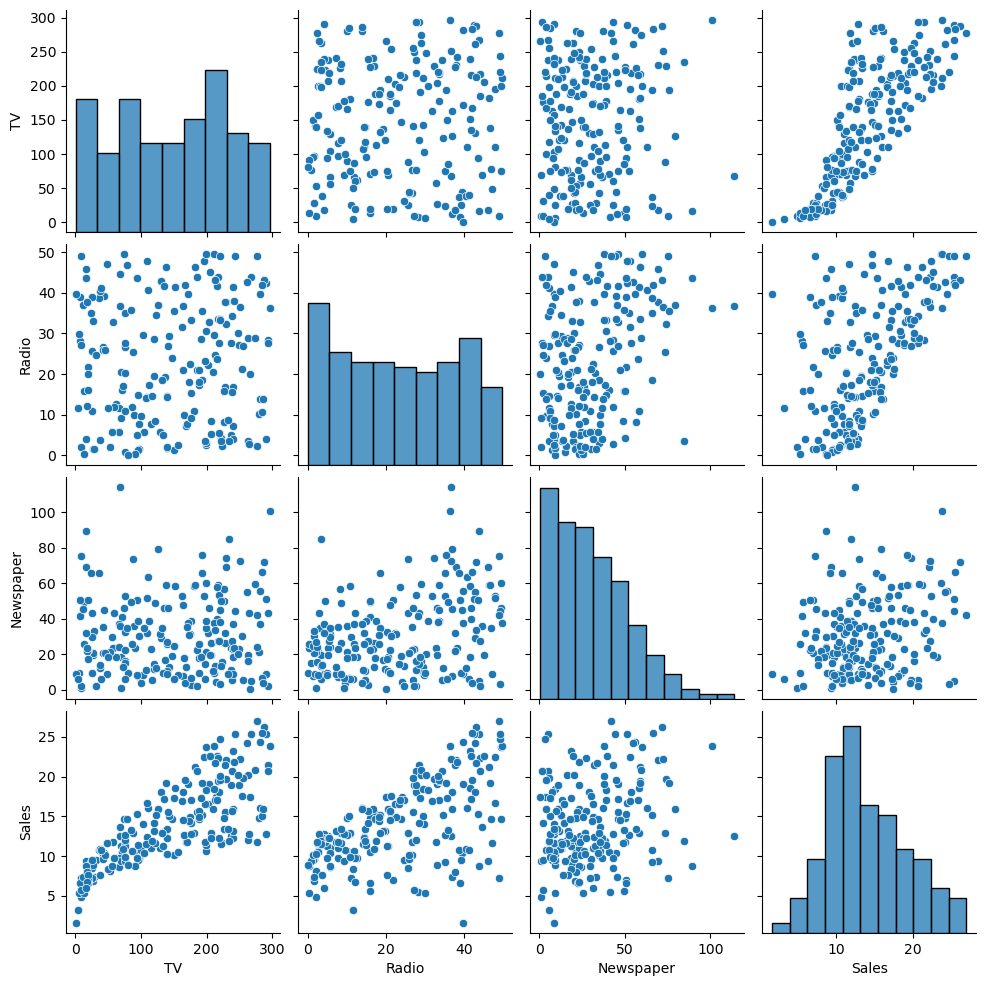

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)
plt.show()

### variance inflation factor (VIF)
- VIF value ranges between 1 to infinity. value 1 indicating no muiticollinearity and the higher value of VIF,the higher value of muiticollinearity.
  - VIF between 1:5 indiating moderate muiticollinearity.
  - VIF between 5:10 indicating higher level of multicollinearity.
  - VIF between 10 .... indicating very high level multicollinearity.

In [15]:
# Cheaking about multicollenarity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [16]:
columns =df.drop(columns='Sales').columns

In [17]:
#VIF dataframe
vif_data=pd.DataFrame()
vif_data['feature']=columns
#calculating VIF for each featre 
vif_data['VIF']=[variance_inflation_factor(df.drop(columns='Sales').values,i)
                for i in range (len(columns))]

In [18]:
vif_data

,feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


### INSIGHTS 
All the features have a VIF of less that 5 hence indicating moderate muiticollinearity.

## REGRESSION MODEL

In [22]:
y=df.Sales
X=df[['TV','Radio','Newspaper']]	

In [26]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [30]:
#Building the model 
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [31]:
y_pred=model.predict(X_train)

In [32]:
print('R Squared : {}'.format(r2_score(y_true=y_train,y_pred=y_pred)))

R Squared : 0.8966445527601499


In [33]:
print(f'Mean Absolute Error: {mean_absolute_error(y_train,y_pred)}')

Mean Absolute Error: 1.2156188847355551


# Mean of Residuals

In [41]:
# Mean of residuals should be equals to zero
residuals=y_train.values-y_pred
mean_residuals=np.mean(residuals)
print("Mean of residuals : {}".format(mean_residuals))

Mean of residuals : -5.269858623554077e-16


### INSIGHT 
- The mean of residuals is almost zero

### Normality of residuals

Text(0.5, 0, 'Errors')

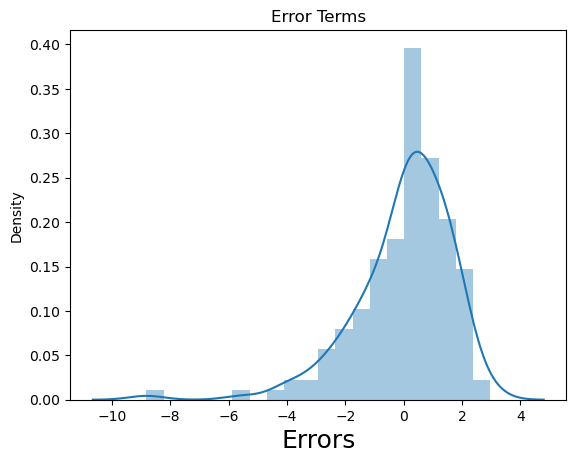

In [45]:
# plotting a histogram for error terms
fig=plt.figure()
sns.distplot(residuals,bins=20)
plt.title('Error Terms')
plt.xlabel('Errors',fontsize=18)

# INSIGHTS 
- Error terms are approximately left-skwed distribution.it it means that the linear regression fitting didn't fit best